# Anomaly Detection in Text with Persistent Homology

In [137]:
pip install numpy matplotlib scikit-learn gudhi pot -q

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Note: you may need to restart the kernel to use updated packages.


In [138]:
# You may need to run this to get the code to work
# conda install pot -q

In [139]:
from gudhi.wasserstein.barycenter import lagrangian_barycenter
import numpy as np

dg1 = np.array([[0., 1.], [0, 2], [1, 2], [1.32, 1.87], [0.7, 1.2]])
dg2 = np.array([[0, 1.5], [0.5, 2], [1.2, 2], [1.3, 1.8], [0.4, 0.8]])
dg3 = np.array([[0.2, 1.1], [0.1, 2.2], [1.3, 2.1], [0.5, 0.9], [0.6, 1.1]])
dg4 = np.array([])
pdiagset = [dg1, dg2, dg3, dg4]
bary = lagrangian_barycenter(pdiagset=pdiagset,init=3)

print("Wasserstein barycenter estimated:")
print(bary)


Wasserstein barycenter estimated:
[[0.5375     1.1625    ]
 [1.275      1.925     ]
 [0.29583333 0.87083333]
 [1.44125    1.70375   ]
 [0.65       0.75      ]
 [0.43333333 1.83333333]]


In [140]:
import gudhi
print("Current gudhi version:", gudhi.__version__)
print("Version >= 3.2.0 is required for this tutorial")

Current gudhi version: 3.8.0
Version >= 3.2.0 is required for this tutorial


In [141]:
# Note: %matplotlib notebook allows for iteractive 3D plot.
#%matplotlib notebook
%matplotlib inline

In [142]:
from gudhi.wasserstein.barycenter import lagrangian_barycenter as bary
from gudhi.persistence_graphical_tools import plot_persistence_diagram

import numpy as np
import matplotlib.pyplot as plt

In [143]:
diag1 = np.array([[0., 1.], [0, 2], [1, 2], [1.32, 1.87], [0.7, 1.2]])
diag2 = np.array([[0, 1.5], [0.5, 2], [1.2, 2], [1.3, 1.8], [0.4, 0.8]])
diag3 = np.array([[0.2, 1.1], [0.1, 2.2], [1.3, 2.1], [0.5, 0.9], [0.6, 1.1]])

diags = [diag1, diag2, diag3]

Text(0.5, 1.0, 'Set of 3 persistence diagrams')

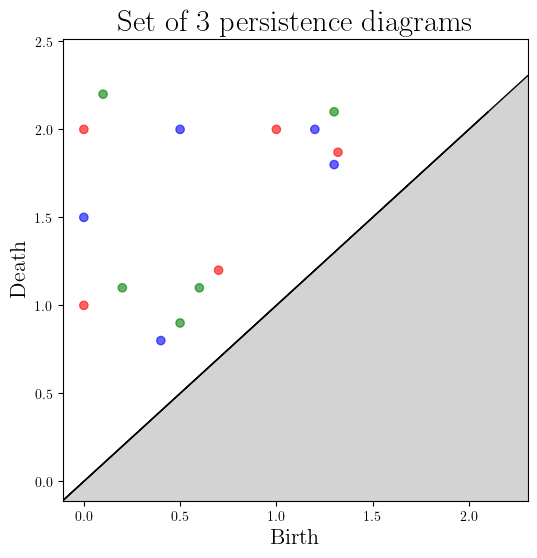

In [144]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
colors=['r', 'b', 'g']
for diag, c in zip(diags, colors):
    plot_persistence_diagram(diag, axes=ax, colormap=c)
ax.set_title("Set of 3 persistence diagrams", fontsize=22)

In [145]:
b, log = bary(diags, 
         init=0,
         verbose=True)  # we initialize our estimation on the first diagram (the red one.)

print("Energy reached by this estimation of the barycenter: E=%.2f." %log['energy'])
print("Convergenced made after %s steps." %log['nb_iter'])

Energy reached by this estimation of the barycenter: E=0.47.
Convergenced made after 2 steps.


In [146]:
G = log["groupings"]

def proj_on_diag(x):
    return ((x[1] + x[0]) / 2, (x[1] + x[0]) / 2)

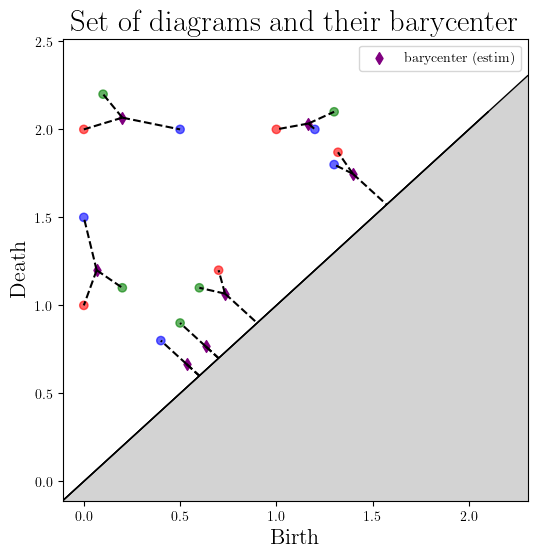

In [147]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
colors = ['r', 'b', 'g']

for diag, c in zip(diags, colors):
    plot_persistence_diagram(diag, axes=ax, colormap=c)

def plot_bary(b, diags, groupings, axes):
    # n_y = len(Y.points)
    for i in range(len(diags)):
        indices = G[i]
        n_i = len(diags[i])

        for (y_j, x_i_j) in indices:
            y = b[y_j]
            if y[0] != y[1]:
                if x_i_j >= 0:  # not mapped with the diag
                    x = diags[i][x_i_j]
                else:  # y_j is matched to the diagonal
                    x = proj_on_diag(y)
                ax.plot([y[0], x[0]], [y[1], x[1]], c='black',
                        linestyle="dashed")

    ax.scatter(b[:,0], b[:,1], color='purple', marker='d', label="barycenter (estim)")
    ax.legend()
    ax.set_title("Set of diagrams and their barycenter", fontsize=22)

plot_bary(b, diags, G, axes=ax)

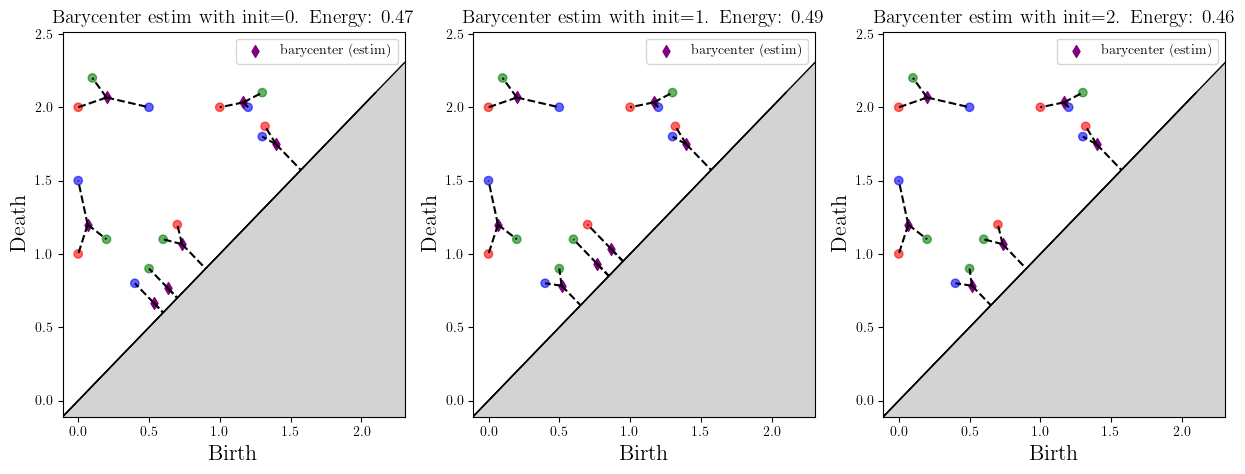

In [148]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

colors = ['r', 'b', 'g']

for i, ax in enumerate(axs):
    for diag, c in zip(diags, colors):
        plot_persistence_diagram(diag, axes=ax, colormap=c)

    b, log = bary(diags, init=i, verbose=True)
    e = log["energy"]
    G = log["groupings"]
    # print(G)
    plot_bary(b, diags, groupings=G, axes=ax)
    ax.set_title("Barycenter estim with init=%s. Energy: %.2f" %(i, e), fontsize=14)

---

In [149]:
text_1 = ["Deep learning is a subfield of machine learning that's based on artificial neural networks with representation learning. It allows computational models composed of multiple layers to learn and represent data with multiple levels of abstraction, mimicking the human brain, thereby helping to decipher patterns and structures in data. Deep learning techniques have been widely applied in several industries and fields such as healthcare, finance, transportation, and more, offering solutions for image and speech recognition, natural language processing, and various other complex tasks.", 
          
          "The power of deep learning lies in its ability to automatically extract features from raw data. Traditional machine learning models require manual feature engineering, where the relevant features are extracted before applying the model. However, with deep learning, the model learns these features itself from the data, which reduces the need for human intervention. This aspect of deep learning has made it an integral part of many modern artificial intelligence systems.", 
          
          "Deep learning models are often built using a layered architecture where each layer learns to transform its input data into a slightly more abstract and composite representation. These layers are interconnected through nodes, or neurons, with each node in a layer connecting to each node in the next layer. The depth of these layers is where deep learning gets its name - 'deep' refers to the number of layers through which the data is transformed.", 
          
          "While deep learning has brought significant advancements, it is also accompanied by certain challenges. These include the need for large amounts of data to train models, the extensive computational power required, and the lack of transparency or interpretability of the models. Despite these challenges, the potential benefits that deep learning can bring to various fields make it an area of intense research and development.", 

          "Deep learning methods have exhibited remarkable success in a plethora of areas and are being increasingly used in the critical domain of healthcare. They are employed for a variety of tasks including disease detection, personalized treatment, drug discovery, and patient care. For instance, convolutional neural networks (CNNs) have shown promise in medical imaging analysis, helping doctors to identify diseases such as cancer at an early stage. Furthermore, recurrent neural networks (RNNs) are utilized in electronic health record data analysis, providing insightful information about patients' health trends and future risks.",

          "A pivotal aspect of deep learning is the concept of representation learning. Unlike traditional machine learning methods that rely on manually engineered features, deep learning algorithms are capable of learning useful features directly from raw data. This is particularly useful in complex domains such as natural language processing, image recognition, and speech recognition, where the design of suitable features can be challenging and time-consuming. By automatically learning these representations, deep learning can achieve state-of-the-art performance on a variety of tasks.", 

          "Deep learning models, like artificial neural networks, are designed to simulate the way the human brain analyzes and processes information. These models are composed of multiple layers of artificial neurons or nodes, each of which can process inputs, apply a set of functions, and pass the result to the next layer. This hierarchical structure allows deep learning models to handle complex tasks by breaking them down into simpler, manageable sub-tasks. This capability has led to breakthroughs in various fields, from computer vision to natural language understanding.", 

          "A compelling advantage of deep learning is its ability to process and generate meaningful information from big data. As the amount of data generated by various sources such as social media, sensors, and IoT devices continues to grow, the need for advanced tools to analyze this data becomes more significant. Deep learning, with its ability to learn from vast amounts of data and generate accurate predictions, is perfectly suited for this task. It has found applications in areas such as predictive maintenance, fraud detection, and customer behavior analysis.", 

          "Despite the numerous successes of deep learning, it is essential to mention its challenges and areas for improvement. One of the key issues is the requirement for large amounts of labeled data to train the models effectively. Obtaining this data can be expensive and time-consuming. Moreover, deep learning models are often criticized for their lack of interpretability; they are frequently referred to as black boxes due to their complex internal workings. Research is being conducted to develop methods for better understanding and visualizing these models, which will not only enhance trust in their predictions but also improve their overall performance.", 
          
          "Let's consider the topic of sustainable agriculture. This practice refers to the production of food, fiber, or other plant or animal products using farming techniques that protect the environment, public health, human communities, and animal welfare. It equires a deep understanding of natural processes. This field is focused on long-term solutions that aim to balance current needs with the future availability of natural resources. Sustainable agriculture techniques may include crop rotation, biological pest control, and the reduction of chemical fertilizers and pesticides."]




In [150]:
import torch
from transformers import BertTokenizer, BertModel
from transformers import BertModel, BertTokenizerFast
from transformers import AutoTokenizer, AutoModel


def compute_output(sentence, layer, head):
    # Load pre-trained model
    tokenizer = AutoTokenizer.from_pretrained('xlm-roberta-large')
    model = AutoModel.from_pretrained("xlm-roberta-large") 


    # Tokenize input and convert to tensor
    inputs = tokenizer(sentence, return_tensors="pt")

    # Forward pass
    # Specify `output_hidden_states=True` when calling the model
    outputs = model(**inputs, output_attentions=True, output_hidden_states=True)

    # Obtain the attention weights
    attentions = outputs.attentions

    # Obtain the attention weights for the specific layer and head
    S = attentions[layer][0, head]

    # Obtain the value vectors
    model.eval()
    with torch.no_grad():
        hidden_states = outputs.hidden_states[layer]
        all_W_v = model.encoder.layer[layer].attention.self.value.weight
        num_heads = model.config.num_attention_heads
        head_dim = model.config.hidden_size // num_heads
        W_v_heads = all_W_v.view(num_heads, head_dim, model.config.hidden_size)
        W_v = W_v_heads[head]
        V = torch.matmul(hidden_states, W_v.t())

    # Compute the output O
    O = torch.matmul(S, V)

    return O


In [151]:
# Set the layer and head to use for computation
layer = 5
head = 10

# Compute the context vectors for each text in the corpus
context_1 = [compute_output(t, layer, head) for t in text_1]


Some weights of the model checkpoint at xlm-roberta-large were not used when initializing XLMRobertaModel: ['lm_head.bias', 'lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing XLMRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at xlm-roberta-large were not used when initializing XLMRobertaModel: ['lm_head.bias', 'lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing XLMRobertaModel from the checkpoint of a

In [152]:
print(context_1[len(text_1)-1].shape)
print(context_1[len(text_1)-1])

torch.Size([1, 120, 64])
tensor([[[ 0.0168, -0.0180, -0.0001,  ..., -0.0075, -0.0069, -0.0028],
         [ 0.0524, -0.0242, -0.0030,  ..., -0.0228, -0.0531,  0.0949],
         [ 0.0148, -0.0244, -0.0226,  ...,  0.0222,  0.0143, -0.0213],
         ...,
         [ 0.0039,  0.0268,  0.0472,  ...,  0.0386,  0.0722,  0.0051],
         [ 0.0389, -0.0690,  0.0291,  ...,  0.0561,  0.0147,  0.0188],
         [-0.0429, -0.0172,  0.0284,  ...,  0.0371,  0.0041, -0.0076]]],
       grad_fn=<CloneBackward0>)


In [153]:
from scipy.spatial import distance_matrix
import gudhi as gd
import numpy as np
import matplotlib.pyplot as plt
from transformers import BertTokenizer

def compute_phrase_distances_and_homology(context_vectors, sentence, phrase):
    # Initialize the tokenizer
    tokenizer = AutoTokenizer.from_pretrained('xlm-roberta-large')

    # Tokenize the sentence and the phrase
    sentence_tokens = tokenizer.encode(sentence, add_special_tokens=False)
    phrase_tokens = tokenizer.encode(phrase, add_special_tokens=False)

    # Find the indices of the phrase tokens in the sentence
    phrase_indices = []
    phrase_length = len(phrase_tokens)
    for i in range(len(sentence_tokens) - phrase_length + 1):
        if sentence_tokens[i:i+phrase_length] == phrase_tokens:
            phrase_indices.extend(range(i, i+phrase_length))
            break

    # Extract the context vectors for the phrase
    phrase_context_vectors = context_vectors[0, phrase_indices]

    # Detach the tensor and convert to numpy array
    phrase_context_vectors_np = phrase_context_vectors.detach().numpy()

    # Compute the pairwise Euclidean distances among the phrase context vectors
    distances = distance_matrix(phrase_context_vectors_np, phrase_context_vectors_np)

    # Compute the persistent homology of the distance matrix
    rips_complex = gd.RipsComplex(distance_matrix=distances, max_edge_length=np.max(distances))
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
    persistent_homology = simplex_tree.persistence(min_persistence=0.001)

    return persistent_homology


### Exclude the last Anomalous Text

In [154]:
# Exclude the last anomalous text using `range(len(text_1)-1)`
diag1 = [compute_phrase_distances_and_homology(context_1[i], text_1[i], text_1[i]) for i in range(len(text_1)-1)]


<Axes: title={'center': 'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

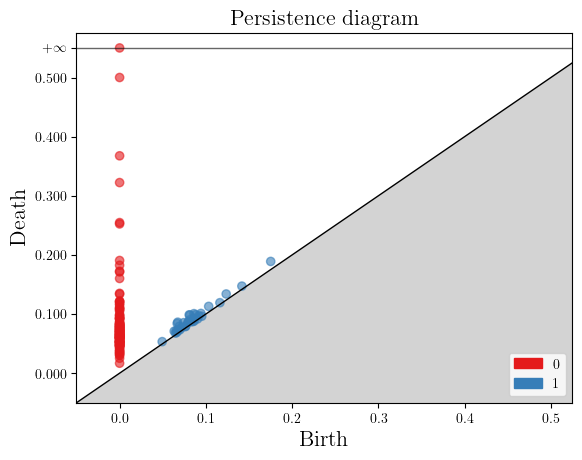

In [155]:
gd.plot_persistence_diagram(persistence=diag1[len(text_1)-2])

<Axes: title={'center': 'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

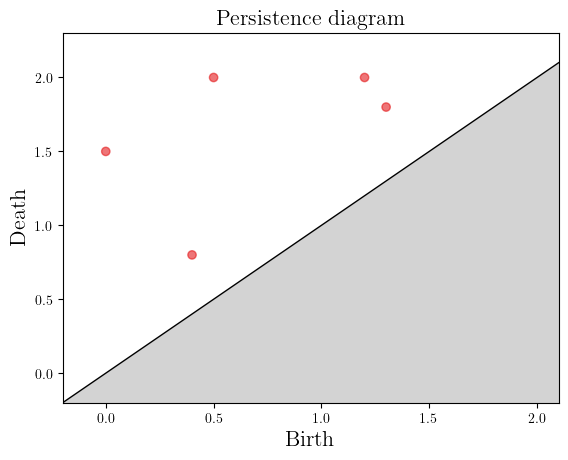

In [156]:
gd.plot_persistence_diagram(persistence=diag2)

In [157]:
def convert_persistence_diagram(diagram):
    return np.array([point[1] for point in diagram if point[1][1] != np.inf])

# Convert your diagrams
dg1 = [convert_persistence_diagram(diagram) for diagram in diag1]

# Now try the barycenter computation again
pdiagset = [dg1[i] for i in range(len(dg1))]
bary = lagrangian_barycenter(pdiagset=pdiagset,init=3)
print(bary)

[[0.1214512  0.13993745]
 [0.14306365 0.15298386]
 [0.12339089 0.1296274 ]
 [0.1977209  0.19986527]
 [0.12516739 0.12903075]
 [0.08310509 0.09744177]
 [0.11657105 0.11998207]
 [0.12268839 0.12433525]
 [0.08176218 0.0901794 ]
 [0.08596548 0.09439886]
 [0.09596188 0.10561846]
 [0.14534901 0.14861964]
 [0.09248472 0.10142706]
 [0.11923065 0.1196422 ]
 [0.10185581 0.11335661]
 [0.11338891 0.11620478]
 [0.15033342 0.15062653]
 [0.12796617 0.12864768]
 [0.         0.76710616]
 [0.         0.38100638]
 [0.         0.34067958]
 [0.         0.28545109]
 [0.         0.25510308]
 [0.         0.2284762 ]
 [0.         0.20968993]
 [0.         0.19907096]
 [0.         0.18714883]
 [0.         0.18115646]
 [0.         0.17159762]
 [0.         0.16816186]
 [0.         0.1618709 ]
 [0.         0.1572169 ]
 [0.         0.14984505]
 [0.         0.1448903 ]
 [0.         0.13910459]
 [0.         0.13550034]
 [0.         0.13044881]
 [0.         0.12772356]
 [0.         0.12570871]
 [0.         0.122831  ]


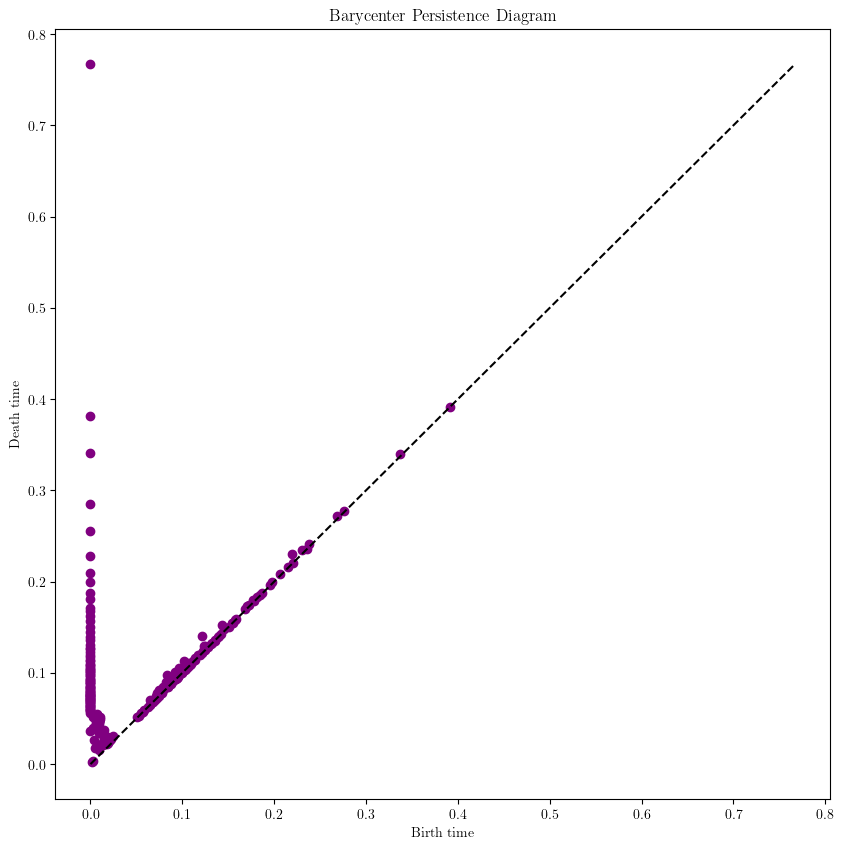

In [158]:
import matplotlib.pyplot as plt

# Convert the barycenter back into a list of tuples format
bary_as_tuples = [(0, tuple(point)) for point in bary]

# Separate birth and death times for plotting
birth_times, death_times = zip(*[point[1] for point in bary_as_tuples])

plt.figure(figsize=(10,10))
plt.scatter(birth_times, death_times, color='purple')
plt.plot([0, max(death_times)], [0, max(death_times)], 'k--')  # diagonal line
plt.title('Barycenter Persistence Diagram')
plt.xlabel('Birth time')
plt.ylabel('Death time')
plt.show()

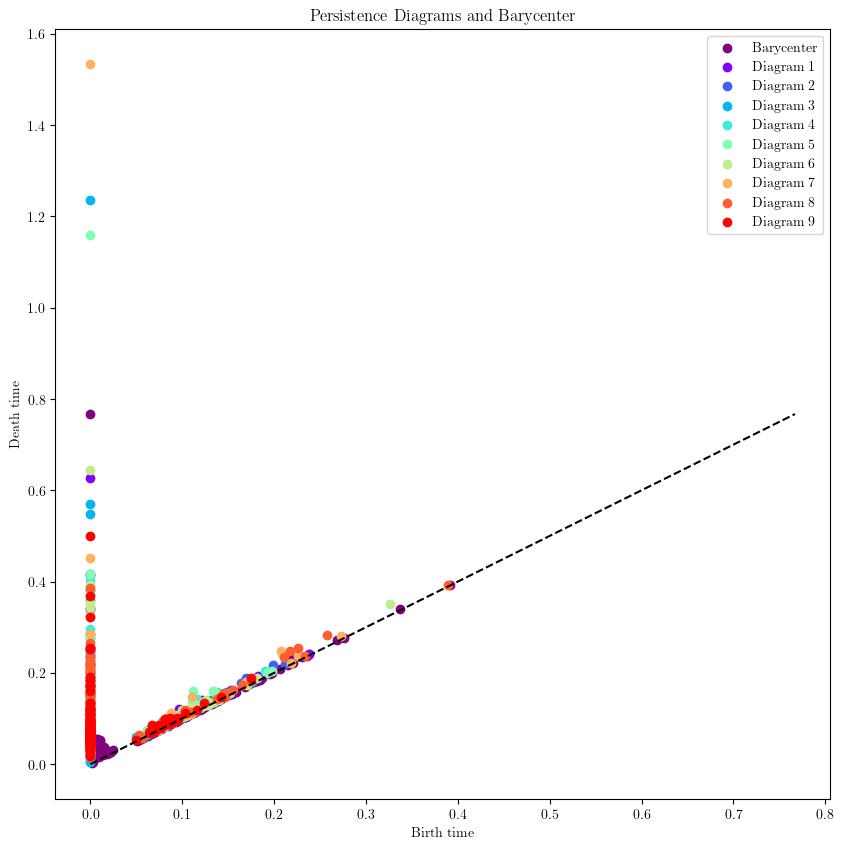

In [159]:

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Convert the barycenter back into a list of tuples format
bary_as_tuples = [(0, tuple(point)) for point in bary]

# Separate birth and death times for plotting
birth_times_bary, death_times_bary = zip(*[point[1] for point in bary_as_tuples])

plt.figure(figsize=(10,10))

# Plot the barycenter
plt.scatter(birth_times_bary, death_times_bary, color='purple', label='Barycenter')

# Plot the original diagrams
colors = cm.rainbow(np.linspace(0, 1, len(dg1)))
for idx, diag in enumerate(dg1):
    birth_times, death_times = zip(*diag)
    plt.scatter(birth_times, death_times, color=colors[idx], label=f'Diagram {idx+1}')

plt.plot([0, max(death_times_bary)], [0, max(death_times_bary)], 'k--')  # diagonal line
plt.title('Persistence Diagrams and Barycenter')
plt.xlabel('Birth time')
plt.ylabel('Death time')
plt.legend()
plt.show()


### Pairwise Wasserstein Distances Between Diagrams

In [160]:
from gudhi import wasserstein

# Initialize an empty dictionary to store the distances
distances = {}

# List of all diagrams
diagrams = dg1

# Compute the Wasserstein distance for each pair of persistence diagrams
for i in range(len(diagrams)):
    for j in range(i+1, len(diagrams)):
        w_dist = wasserstein.wasserstein_distance(diagrams[i], diagrams[j])
        distances[(i, j)] = w_dist

# Print the computed distances
print(distances)
# Print the computed distances
for pair, dist in distances.items():
    print(f"The Wasserstein distance between diagram {pair[0]+1} and diagram {pair[1]+1} is: {dist}")


{(0, 1): 2.1534960296026386, (0, 2): 3.4847687859925736, (0, 3): 2.3911159791524916, (0, 4): 2.2844962691220574, (0, 5): 1.2791997016917025, (0, 6): 1.9302145945546005, (0, 7): 1.6575500853690797, (0, 8): 2.033477090770494, (1, 2): 2.8024195975556996, (1, 3): 0.9214352754361669, (1, 4): 3.8231661912922568, (1, 5): 2.3945252383664113, (1, 6): 2.755803379505555, (1, 7): 1.8433221265042805, (1, 8): 2.1015001348164777, (2, 3): 3.104198855250748, (2, 4): 4.041835741654501, (2, 5): 3.6966765602619223, (2, 6): 2.893848386910099, (2, 7): 3.5852732453762575, (2, 8): 2.6456876702444525, (3, 4): 3.716177189314523, (3, 5): 2.3397146112299616, (3, 6): 2.9336803892181464, (3, 7): 1.964065894661587, (3, 8): 2.3855789684053965, (4, 5): 2.2823186078248603, (4, 6): 2.154615095359148, (4, 7): 2.568310288207175, (4, 8): 3.272012524601945, (5, 6): 2.1302505034877526, (5, 7): 1.7550390764600023, (5, 8): 2.521629715268073, (6, 7): 1.8573930432960446, (6, 8): 2.546887907911289, (7, 8): 2.522244105703868}
The 

### As a Distance Matrix

In [161]:
import numpy as np

# Create an empty distance matrix
n = len(diagrams)
distance_mtx = np.zeros((n, n))

# Fill the matrix with the computed distances
for pair, dist in distances.items():
    i, j = pair
    distance_mtx[i][j] = dist
    distance_mtx[j][i] = dist  # The distance matrix is symmetric

# Print the distance matrix
print(distance_mtx)


[[0.         2.15349603 3.48476879 2.39111598 2.28449627 1.2791997
  1.93021459 1.65755009 2.03347709]
 [2.15349603 0.         2.8024196  0.92143528 3.82316619 2.39452524
  2.75580338 1.84332213 2.10150013]
 [3.48476879 2.8024196  0.         3.10419886 4.04183574 3.69667656
  2.89384839 3.58527325 2.64568767]
 [2.39111598 0.92143528 3.10419886 0.         3.71617719 2.33971461
  2.93368039 1.96406589 2.38557897]
 [2.28449627 3.82316619 4.04183574 3.71617719 0.         2.28231861
  2.1546151  2.56831029 3.27201252]
 [1.2791997  2.39452524 3.69667656 2.33971461 2.28231861 0.
  2.1302505  1.75503908 2.52162972]
 [1.93021459 2.75580338 2.89384839 2.93368039 2.1546151  2.1302505
  0.         1.85739304 2.54688791]
 [1.65755009 1.84332213 3.58527325 1.96406589 2.56831029 1.75503908
  1.85739304 0.         2.52224411]
 [2.03347709 2.10150013 2.64568767 2.38557897 3.27201252 2.52162972
  2.54688791 2.52224411 0.        ]]


In [162]:
import numpy as np

# Convert diagrams and barycenter into the correct format
diagrams_np = [np.array(diag) for diag in diagrams]
bary_diag_np = np.array(bary_diag)

# Compute the Wasserstein distance between each diagram and the barycenter
distances_to_barycenter = [wasserstein.wasserstein_distance(diag, bary_diag_np) for diag in diagrams_np]

# Compute the desired statistics
max_distance = np.max(distances_to_barycenter)
min_distance = np.min(distances_to_barycenter)
mean_distance = np.mean(distances_to_barycenter)
median_distance = np.median(distances_to_barycenter)
variance = np.var(distances_to_barycenter)
standard_deviation = np.std(distances_to_barycenter)
first_quantile = np.percentile(distances_to_barycenter, 25)
third_quantile = np.percentile(distances_to_barycenter, 75)

# Compute outliers
iqr = third_quantile - first_quantile
lower_bound = first_quantile - 1.5 * iqr
upper_bound = third_quantile + 1.5 * iqr
outliers = [x for x in distances_to_barycenter if x < lower_bound or x > upper_bound]

# Print the results
print(f"Max distance: {max_distance}")
print(f"Min distance: {min_distance}")
print(f"Mean distance: {mean_distance}")
print(f"Median distance: {median_distance}")
print(f"Variance: {variance}")
print(f"Standard deviation: {standard_deviation}")
print(f"First quantile: {first_quantile}")
print(f"Third quantile: {third_quantile}")
print(f"Outliers: {outliers}")


Max distance: 3.353402507512098
Min distance: 1.8290239185759114
Mean distance: 2.3484387309508916
Median distance: 2.162856457712807
Variance: 0.2880660553927199
Standard deviation: 0.5367178545499673
First quantile: 1.8997977867887805
Third quantile: 2.5100558649452633
Outliers: []


In [163]:
# Compute the phrase distances and homology for the last diagram
diag2 = compute_phrase_distances_and_homology(context_1[len(text_1)-1], text_1[len(text_1)-1], text_1[len(text_1)-1])

# Convert the persistence diagram
last_diag = convert_persistence_diagram(diag2)
# Convert the diagrams to numpy arrays
last_diag_np = np.array(last_diag)
bary_diag_np = np.array(bary_diag)

# Compute the Wasserstein distance
wasserstein_distance = wasserstein.wasserstein_distance(last_diag_np, bary_diag_np)
print("The Wasserstein distance between the last diagram and the Fréchet mean diagram is: ", wasserstein_distance)


The Wasserstein distance between the last diagram and the Fréchet mean diagram is:  4.22119240124848


From this, we see the Wasserstein distance to the Fréchet mean diagram is significantly larger, meaning the new unseen text is anomalous in comparison to the first nine diagrams which have content related to deep learning as apposed to having an argicultural content as in the last context. 